In [1]:
import torch
import numpy as np
import pandas as pd
from fastai.vision.all import *
from PIL import Image, ImageFilter
import os

In [9]:
import ipywidgets as widgets
from fastai.vision.widgets import *

upload = widgets.FileUpload(multiple=False)
upload

FileUpload(value={}, description='Upload')

#### Let us display the unprocessed digit image we want to classify

<AxesSubplot:>

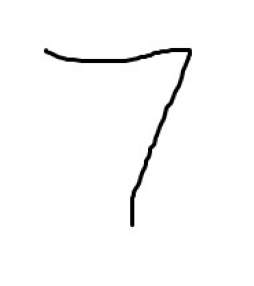

In [10]:
test_img = PILImage.create(upload.data[-1])
show_image(test_img)

In [11]:
type(test_img)

fastai.vision.core.PILImage

#### Perform preprocessing on image to convert to a format consistent with images in mnist dataset

In [12]:
def convert_to_mnist_format(img):
    """
    This function performs processing to convert raw iput images to format of standard mnist dataset images.
    All images are size normalized to fit in a 20x20 pixel box and there are centered in a 28x28 image using 
    the center of mass. The input is a PIL image object.
    """
    im = img.convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    new_image = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((20.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((20, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        new_image.paste(img, (4, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((20.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 20), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        new_image.paste(img, (wleft, 4))  # paste resized image on white canvas

    new_image.save("./dataset/test_img_mnist_format.jpg")

    tv = list(new_image.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]    
    return np.array(tva).reshape(28, 28), new_image

<AxesSubplot:>

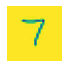

In [13]:
test_img_mnist_format_arr, test_img_mnist_format = convert_to_mnist_format(test_img)
show_image(test_img_mnist_format)

In [14]:
df_img_test = pd.DataFrame(test_img_mnist_format_arr)
df_img_test.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.011765,0.011765,0.011765,0.011765,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090196,0.043137,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.137255,0.600000,0.419608,0.301961,0.278431,0.278431,0.286275,0.419608,0.560784,0.494118,0.333333,0.709804,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113725,0.203922,0.219608,0.219608,0.227451,0.117647,0.000000,0.000000,0.000000,0.415686,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.368627,0.215686,0.000000,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
def predict_digit(img, model):
    print(img.shape, img.dtype)
    input_img_tensor = img.view(1, -1)
    print(input_img_tensor.shape)
    pred = model(input_img_tensor)
    print(pred)
    max_probab, pred_label = torch.max(pred, dim=1)
    print(float(max_probab), pred_label)
    return pred_label

PATH = "MnistDigitClassifier.pt"
model = torch.load(PATH)
test_image_tensor = torch.from_numpy(test_img_mnist_format_arr).float()
pred_lbl = predict_digit(test_image_tensor, model)
print(f'Predicted digit: {pred_lbl[0]}')

torch.Size([28, 28]) torch.float32
torch.Size([1, 784])
tensor([[-2.7270, -2.4041, -1.7734, -1.9118, -3.1023, -2.8001, -3.4930, -1.4921,
         -2.3643, -2.6368]], grad_fn=<LogSoftmaxBackward>)
-1.4921139478683472 tensor([7])
Predicted digit: 7
